In [1]:
import bakeoff_opt
import matplotlib.pyplot as plt
import numpy as np
import seaborn

import nb_helpers

seaborn.set()

In [2]:
by_size = {}
nodes_sizes = (2, 4, 8, 16, 32, 64)
possible_s_vals = (3, 9, 33, 129, 513)

In [3]:
for num_nodes in nodes_sizes:
    for num_s_vals in possible_s_vals:
        nodes, s_vals = nb_helpers.generate_nodes(num_nodes, num_s_vals, 798031893)
        key = ("forall1", num_nodes, num_s_vals)
        by_size[key] = %timeit -o -q bakeoff_opt.forall1(nodes, s_vals)
        key = ("spread1", num_nodes, num_s_vals)
        by_size[key] = %timeit -o -q bakeoff_opt.spread1(nodes, s_vals)
        key = ("serial", num_nodes, num_s_vals)
        by_size[key] = %timeit -o -q bakeoff_opt.serial(nodes, s_vals)

In [4]:
def plot_data(ax, nodes_sizes, by_size, num_s_vals):
    for fn_name in ("forall1", "spread1", "serial"):
        x_vals = []
        y_vals = []
        y_below = []
        y_above = []
        for num_nodes in nodes_sizes:
            timeit_result = by_size[(fn_name, num_nodes, num_s_vals)]
            # 2 std deviations ~= 95%
            below = timeit_result.average - 2.0 * timeit_result.stdev
            above = timeit_result.average + 2.0 * timeit_result.stdev
            # If the running time goes non-positive, ignore the datapoint
            if below <= 0.0:
                continue
            
            x_vals.append(num_nodes)
            y_vals.append(timeit_result.average)
            y_below.append(below)
            y_above.append(above)

        line, = ax.loglog(x_vals, y_vals, marker="o", label=fn_name)
        ax.fill_between(
            x_vals, y_below, y_above, alpha=0.5, color=line.get_color()
        )

    ax.set_xscale("log", basex=2)
    ax.set_yscale("log", basey=2)
    ax.set_title(f"Number of Input Values: {num_s_vals}")
    ax.set_xlabel("Number of Nodes")
    ax.set_ylabel("Average Evaluation Time (s)")
    ax.legend()

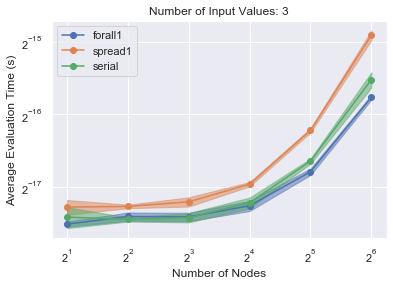

In [5]:
figure = plt.figure()
plot_data(figure.gca(), nodes_sizes, by_size, 3)

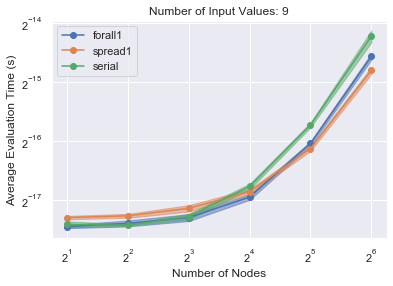

In [6]:
figure = plt.figure()
plot_data(figure.gca(), nodes_sizes, by_size, 9)

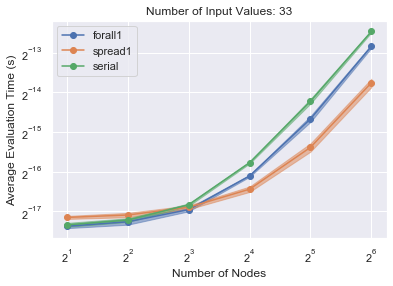

In [7]:
figure = plt.figure()
plot_data(figure.gca(), nodes_sizes, by_size, 33)

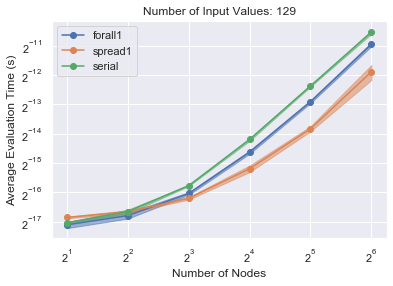

In [8]:
figure = plt.figure()
plot_data(figure.gca(), nodes_sizes, by_size, 129)

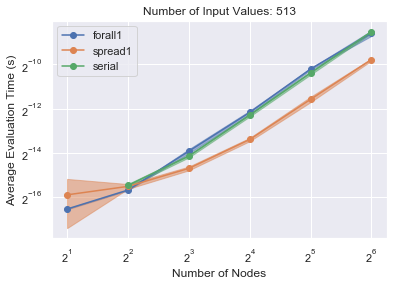

In [9]:
figure = plt.figure()
plot_data(figure.gca(), nodes_sizes, by_size, 513)

## Constant vs. Log-Linear Regimes

Note that for each `k` value, there seems to be a number of nodes `N` after which the `forall1` and `serial` lines go from constant to log-linear with slope equal to 2 (i.e. quadratic). As `k` increases, this value appears to decrease:

- `k = 3`, regime change when `N` is between `16` and `32`
- `k = 9`, regime change when `N` is between `16` and `32`
- `k = 33`, regime change when `N` is between `8` and `16`
- `k = 129`, regime change when `N = 8`
- `k = 513`, regime change when `N = 4`